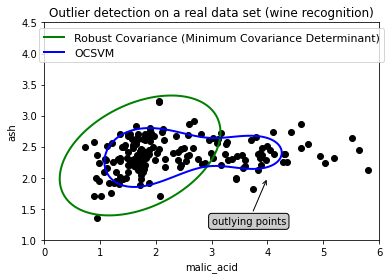

In [1]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine

# 사용할 "분류"
classifiers = {
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.25),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35)}
colors = ['g', 'b']
legend1 = {}
legend2 = {}

# 데이터 가져오기
X1 = load_wine()['data'][:, [1, 2]]  # 두 개의 클러스터

# 여러 분류기를 사용하여 이상값 감지를 위한 프론티어 알아보기
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# 결과를 플로팅 (= 데이터 포인트 클라우드의 모양)
plt.figure(1)  # 두 개의 클러스터
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("outlying points", xy=(4, 2),
             xycoords="data", textcoords="data",
             xytext=(3, 1.25), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel("ash")
plt.xlabel("malic_acid")

plt.show()

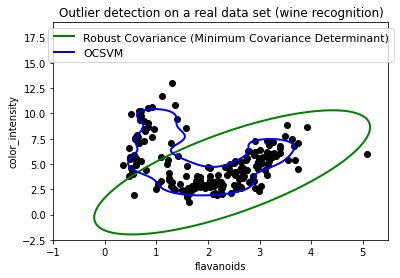

In [2]:
# 데이터 가져오기
X2 = load_wine()['data'][:, [6, 9]]  # "banana"-shaped

# 여러 분류기를 사용하여 이상값 감지를 위한 프론티어 알아보기
xx2, yy2 = np.meshgrid(np.linspace(-1, 5.5, 500), np.linspace(-2.5, 19, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

# 결과를 플로팅 (= 데이터 포인트 클라우드의 모양)
plt.figure(2)  # "바나나" 모양
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0]),
           (legend2_keys_list[0], legend2_keys_list[1]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel("color_intensity")
plt.xlabel("flavanoids")

plt.show()